# Invoke Bedrock model for code generation

> *This notebook should work well with the **`Data Science 3.0`** kernel in SageMaker Studio*

## Architecture

![](./images/bedrock-code-gen.png)

### Persona

You are Moe, a Data Analyst, at AnyCompany. The company wants to understand its sales performance for different products for different products over the past year. You have been provided a dataset named sales.csv. The dataset contains the following columns:

- Date (YYYY-MM-DD) format
- Product_ID (unique identifer for each product)
- Price (price at which each product was sold)
- Units sold

## Setup


In [1]:
import json
import os
import sys

import boto3

module_path = ".."
sys.path.append(os.path.abspath(module_path))
from labutils import bedrock, print_ww


# ---- ⚠️ Un-comment and edit the below lines as needed for your AWS setup ⚠️ ----

# os.environ["AWS_DEFAULT_REGION"] = "<REGION_NAME>"  # E.g. "us-east-1"
# os.environ["AWS_PROFILE"] = "<YOUR_PROFILE>"
# os.environ["BEDROCK_ASSUME_ROLE"] = "<YOUR_ROLE_ARN>"  # E.g. "arn:aws:..."


boto3_bedrock = bedrock.get_bedrock_client(
    assumed_role=os.environ.get("BEDROCK_ASSUME_ROLE", None),
    region=os.environ.get("AWS_DEFAULT_REGION", None),
)

Create new client
  Using region: us-east-1
boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-east-1.amazonaws.com)


## Generate sample sales.csv data for this demo



In [2]:
# create sales.csv file
import csv

data = [
    ["date", "product_id", "price", "units_sold"],
    ["2023-01-01", "P001", 50, 20],
    ["2023-01-02", "P002", 60, 15],
    ["2023-01-03", "P001", 50, 18],
    ["2023-01-04", "P003", 70, 30],
    ["2023-01-05", "P001", 50, 25],
    ["2023-01-06", "P002", 60, 22],
    ["2023-01-07", "P003", 70, 24],
    ["2023-01-08", "P001", 50, 28],
    ["2023-01-09", "P002", 60, 17],
    ["2023-01-10", "P003", 70, 29],
    ["2023-02-11", "P001", 50, 23],
    ["2023-02-12", "P002", 60, 19],
    ["2023-02-13", "P001", 50, 21],
    ["2023-02-14", "P003", 70, 31],
    ["2023-03-15", "P001", 50, 26],
    ["2023-03-16", "P002", 60, 20],
    ["2023-03-17", "P003", 70, 33],
    ["2023-04-18", "P001", 50, 27],
    ["2023-04-19", "P002", 60, 18],
    ["2023-04-20", "P003", 70, 32],
    ["2023-04-21", "P001", 50, 22],
    ["2023-04-22", "P002", 60, 16],
    ["2023-04-23", "P003", 70, 34],
    ["2023-05-24", "P001", 50, 24],
    ["2023-05-25", "P002", 60, 21]
]

# Write data to sales.csv
with open('sales.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("sales.csv has been created!")

sales.csv has been created!


## Build the prompt

In [3]:
# Create the prompt
# Analyzing sales

prompt_data = """

Human: You have a CSV, sales.csv, with columns:
- date (YYYY-MM-DD)
- product_id
- price
- units_sold

Create a python program to analyze the sales data from a CSV file. The program should be able to read the data, and determine below:

- Total revenue for the year
- The product with the highest revenue
- The date with the highest revenue
- Visualize monthly sales using a bar chart

Ensure the code is syntactically correct, bug-free, optimized, not span multiple lines unnessarily, and prefer to use standard libraries. Return only python code without any surrounding text, explanation or context.

Assistant:
"""

## Construct the request payload

In [4]:
# Claude - Body Syntex
body = json.dumps({
    "anthropic_version": "bedrock-2023-05-31",
    "messages": [
        {"role": "user", "content": prompt_data}
    ],
    "max_tokens": 4096,
    "temperature": 0.5,
    "top_k": 250,
    "top_p": 0.5,
    "stop_sequences": ["\n\nHuman:"]
})

## Invoke the model

In [6]:
modelId = "anthropic.claude-3-sonnet-20240229-v1:0"
# change this to use a different version from the model provider
accept = 'application/json'
contentType = 'application/json'

response = boto3_bedrock.invoke_model(body=body, modelId=modelId)
response_body = json.loads(response.get('body').read())

response_text = response_body["content"][0]["text"]
print(response_text)

import csv
from collections import defaultdict
import matplotlib.pyplot as plt

# Read data from CSV file
data = []
with open('sales.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

# Calculate total revenue for the year
total_revenue = sum(float(row['price']) * int(row['units_sold']) for row in data)

# Find the product with the highest revenue
product_revenue = defaultdict(float)
for row in data:
    product_revenue[row['product_id']] += float(row['price']) * int(row['units_sold'])
highest_revenue_product = max(product_revenue.items(), key=lambda x: x[1])[0]

# Find the date with the highest revenue
date_revenue = defaultdict(float)
for row in data:
    date_revenue[row['date']] += float(row['price']) * int(row['units_sold'])
highest_revenue_date = max(date_revenue.items(), key=lambda x: x[1])[0]

# Visualize monthly sales
monthly_sales = defaultdict(float)
for row in data:
    month = row['date'].split('-')[1]
    monthly_sales[m

## (Optional) Run the code to check it works

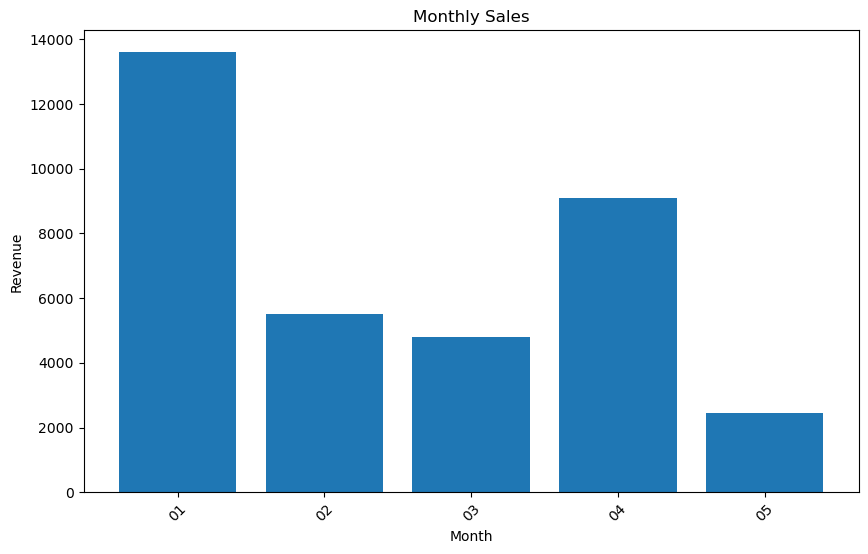

Total revenue for the year: $35490.00
Product with the highest revenue: P003
Date with the highest revenue: 2023-04-23


In [7]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

# Read data from CSV file
data = []
with open('sales.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

# Calculate total revenue for the year
total_revenue = sum(float(row['price']) * int(row['units_sold']) for row in data)

# Find the product with the highest revenue
product_revenue = defaultdict(float)
for row in data:
    product_revenue[row['product_id']] += float(row['price']) * int(row['units_sold'])
highest_revenue_product = max(product_revenue.items(), key=lambda x: x[1])[0]

# Find the date with the highest revenue
date_revenue = defaultdict(float)
for row in data:
    date_revenue[row['date']] += float(row['price']) * int(row['units_sold'])
highest_revenue_date = max(date_revenue.items(), key=lambda x: x[1])[0]

# Visualize monthly sales
monthly_sales = defaultdict(float)
for row in data:
    month = row['date'].split('-')[1]
    monthly_sales[month] += float(row['price']) * int(row['units_sold'])

months = sorted(monthly_sales.keys())
sales = [monthly_sales[month] for month in months]

plt.figure(figsize=(10, 6))
plt.bar(months, sales)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.show()

print(f"Total revenue for the year: ${total_revenue:.2f}")
print(f"Product with the highest revenue: {highest_revenue_product}")
print(f"Date with the highest revenue: {highest_revenue_date}")

In [ ]:
# Sample Generated Python Code ( Generated with Amazon Bedrock in previous step)

import csv
from collections import defaultdict
import matplotlib.pyplot as plt

revenue = 0
monthly_revenue = defaultdict(int)
product_revenue = defaultdict(int)
max_revenue = 0
max_revenue_date = ''
max_revenue_product = ''

with open('sales.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        date = row[0]
        product = row[1]
        price = float(row[2])
        units = int(row[3])

        revenue += price * units
        product_revenue[product] += price * units
        monthly_revenue[date[:7]] += price * units

        if revenue > max_revenue:
            max_revenue = revenue
            max_revenue_date = date
            max_revenue_product = product

months = list(monthly_revenue.keys())
values = list(monthly_revenue.values())

plt.bar(months, values)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.show()

print('Total Revenue:', revenue)
print('Product with max revenue:', max_revenue_product)
print('Date with max revenue:', max_revenue_date)